# GA 1.3: Modelling Road Deformation using Non-Linear Least-Squares

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.3. Due: Friday, September 20, 2024.*

<div style="background-color:#ffa6a6; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"><p><b>Notes:</b>

- Don't forget to read the "Assignment Context" section of the README, it contains important information to understand this analysis.
- The Markdown questions and answers in this notebook are <em>not</em> graded; they are to help you make observations and describe results, which will eventually go in your <code>Report.md</code>.
</p></div>

In [105]:
import numpy as np
from scipy import interpolate
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt


from functions import *

np.set_printoptions(precision=3)

## Part 0: Dictionary Review

As described above, several functions in this assignment require the use of a Python dictionary to make it easier to keep track of important data, variables and results for the various _models_ we will be constructing and validating.

_It may be useful to revisit PA 1.1, where there was a brief infroduction to dictionaires. That PA contains all the dictionary info you need for GA 1.3. A [read-only copy is here](https://mude.citg.tudelft.nl/2024/files/Week_1_1/PA_1_1_Catch_Them_All.html) and [the source code (notebook) is here](https://gitlab.tudelft.nl/mude/2024-week-1-1)._

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\textbf{Task 0.1}$ 
    
Read and run the cell below to make sure you remember how to use a dictionary.

Modify the function to print some of the other key-value pairs of the dictionary.

<em>It may also be useful to use the cell below when working on later tasks in this assignment.</em>
    
</p>
</div>

In [106]:
my_dictionary = {'key1': 'value1',
                 'key2': 'value2',
                 'name': 'Dictionary Example',
                 'a_list': [1, 2, 3],
                 'an_array': np.array([1, 2, 3]),
                 'a_string': 'hello'
                 }

def function_that_uses_my_dictionary(d):
    print(d['key1'])

    # SOLUTION:
    print(d['name'])
    print(d['a_list'])
    print(d['an_array'])
    print(d['a_string'])

    if 'new_key' in d:
        print('new_key exists and has value:', d['new_key'])
    return

function_that_uses_my_dictionary(my_dictionary)

value1
Dictionary Example
[1, 2, 3]
[1 2 3]
hello


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\textbf{Task 0.2}$ 

Test your knowledge by adding a new key <code>new_key</code> and then executing the function to print the value.
    
</p>
</div>

In [107]:
my_dictionary['new_key'] = 'new_value'
function_that_uses_my_dictionary(my_dictionary)

value1
Dictionary Example
[1, 2, 3]
[1 2 3]
hello
new_key exists and has value: new_value


## Task 1: Preparing the data

Within this assignment you will work with two types of data: InSAR data and GNSS data. The cell below will load the data and visualize the observed displacements time. In this task we use the package `pandas`, which is really useful for handling time series. We will learn how to use it later in the quarter; for now, you only need to recognize that it imports the data as a `dataframe` object, which we then convert into a numpy array using the code below.

<div style="background-color:#facb8e; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Tip: note that we have converted all observations to millimeters.</p></div>

In [108]:
gnss = pd.read_csv('./data/gnss_observations.csv')
times_gnss = pd.to_datetime(gnss['times'])
y_gnss = (gnss['observations[m]']).to_numpy()*1000

insar = pd.read_csv('./data/insar_observations.csv')
times_insar = pd.to_datetime(insar['times'])
y_insar = (insar['observations[m]']).to_numpy()*1000

gw = pd.read_csv('./data/groundwater_levels.csv')
times_gw = pd.to_datetime(gw['times'])
y_gw = (gw['observations[mm]']).to_numpy()



<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
    
Once you have used the cell above to import the data, investigate the data sets using the code cell below. Then provide some relevant summary information in the Markdown cell.

<em>Hint: at the least, you should be able to tell how many data points are in each data set and get an understanding of the mean and standard deviation of each. Make sure you compare the different datasets and use consistent units.</em>
    
</p>
</div>

In [109]:
mean_y_gnss = np.mean(y_gnss)
std_y_gnss = np.std(y_gnss)

mean_y_insar = np.mean(y_insar)
std_y_insar = np.std(y_insar)

mean_y_gw = np.mean(y_gw)
std_y_gw = np.std(y_gw)

print('GNSS observations:')
print('Number of observations:', len(y_gnss))
print('Mean:', mean_y_gnss, 'Standard deviation:', std_y_gnss)
print()
print('InSAR observations:')
print('Number of observations:', len(y_insar))
print('Mean:', mean_y_insar, 'Standard deviation:', std_y_insar)
print()
print('Groundwater observations:')
print('Number of observations:', len(y_gw))
print('Mean:', mean_y_gw, 'Standard deviation:', std_y_gw)



GNSS observations:
Number of observations: 730
Mean: -26.998775875445148 Standard deviation: 16.2218064476615

InSAR observations:
Number of observations: 61
Mean: -25.459757789872686 Standard deviation: 6.8998022892131585

Groundwater observations:
Number of observations: 25
Mean: -127.70472 Standard deviation: 16.822297827633417


You may have noticed that the groundwater data is available for different times than the GNSS and InSAR data. You will therefore have to *interpolate* the data to the same times for a further analysis. You can use the SciPy function ```interpolate.interp1d``` (read its [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)).

The cells below do the following:
1. Define a function to convert the time unit
2. Convert the time stamps for all data
3. Use `interp1d` to interpolate the groundwater measurements at the time of the satellite measurements

In [110]:
def to_days_years(times):
    '''Convert the observation times to days and years.'''
    
    times_datetime = pd.to_datetime(times)
    time_diff = (times_datetime - times_datetime[0])
    days_diff = (time_diff / np.timedelta64(1,'D')).astype(int)
    
    days = days_diff.to_numpy()
    years = days/365
    
    return days, years

In [111]:
days_gnss,  years_gnss  = to_days_years(times_gnss)
days_insar, years_insar = to_days_years(times_insar)
days_gw,    years_gw    = to_days_years(times_gw)

interp = interpolate.interp1d(days_gw, y_gw)

GW_at_GNSS_times = interp(days_gnss)
GW_at_InSAR_times = interp(days_insar)






<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   
    
Answer/complete the code and Markdown cells below:
<ol>
    <li>What is <code>interp</code>? (what kind of object is it, and how does it work?)</li>
    <li>How did the groundwater observation array change? Be quantitative. </li>
</ol>
    
</p>
</div>

In [112]:
print('GW observations at GNSS times:', len(GW_at_GNSS_times))
print('GW observations at InSAR times:', len(GW_at_InSAR_times))



GW observations at GNSS times: 730
GW observations at InSAR times: 61


1. With the interp function, we're making sure we can evaluate the groundwater table at more points in time. So by using the interp function, we use the GNSS / InSAR to evaluate the groundwater levels at these time intervals. So for example, by linearly interpolating with the help of the GNSS time points, the groundwater heights over the same time intervals as the GNSS data. 

2. The groundwater observation are now equal to the same length as the GNSS and INSAR data. We interpolated the groundwater values over the time stamps of the GNSS and INSAR time points. As can be seen in the cell above, the groundwater increased from 25 to 730 points and from 25 to 61 points.



<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b>   
    
Create a single plot to compare observed displacement for the GNSS and InSAR data sets.
    
</p>
</div>

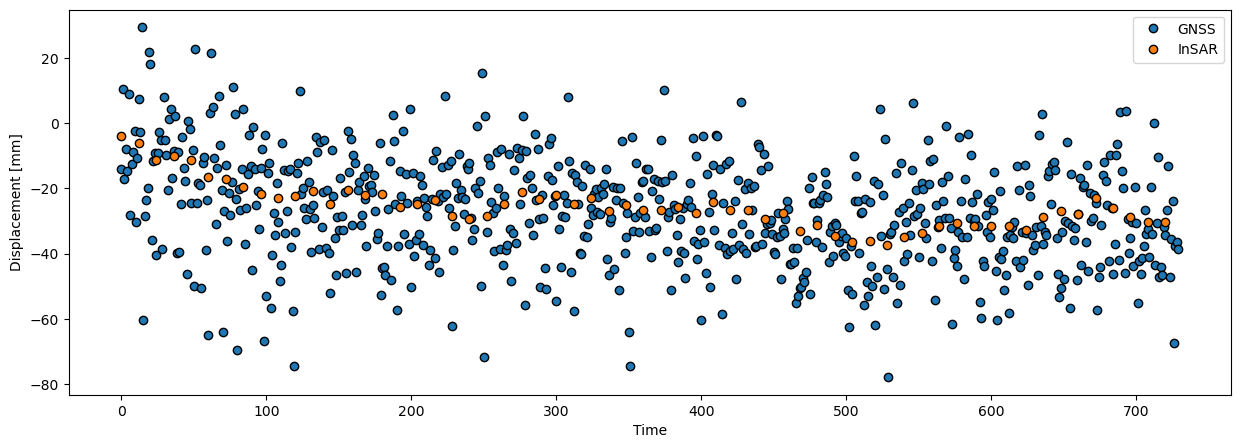

In [113]:
plt.figure(figsize=(15,5))
plt.plot(days_gnss, y_gnss,
         'o', mec='black', label = 'GNSS')
plt.plot(days_insar, y_insar,
         'o', mec='black', label = 'InSAR')
plt.legend()
plt.ylabel('Displacement [mm]')
plt.xlabel('Time')
plt.show()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.4:</b>   
Describe the datasets based on the figure above and your observations from the previous tasks. What kind of deformation do you see? And what are the differences between both datasets? Be quantitative.
</p>
</div>

 The GNSS data has more (730) data points than the InSAR data (61), but the precision of the GNSS data is way lower than the InVAR. This is easily explaied by looking at the standard deviations of the two data sets. Whereas the GNS dataS has a standar deviation of 16.22, the InVAR data has a standard deviation of 6.90. A higher standard deviation gives a lower precision. This is clearly visible in the plot, as the GNSSdata has a large variation.
 
Both data sets are linearly decreasing and therefore in the long run having a negative deformation. This implies that the ground is subsiding in the long run.



Before we move on, it is time to do a little bit of housekeeping.

Have you found it confusing to keep track of two sets of variables---one for each data type? Let's use a dictionary to store relevant information about each model. We will use this in the plotting functions for this task (and again next week), so make sure you take the time to see what is happening. Review also Part 0 at the top of this notebook if you need a refresher on dictionaries.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.5:</b>   
    
Run the cell below to define a dictionary for storing information about the two (future) models.

</p>
</div>


In [114]:
model_insar = {'data_type': 'InSAR',
               'y':y_insar,
               'times':times_insar,
               'groundwater': GW_at_InSAR_times
               }

model_gnss = {'data_type': 'GNSS',
               'y':y_gnss,
               'times':times_gnss,
               'groundwater': GW_at_GNSS_times
               }

## Task 2: Set-up linear functional model

We want to investigate how we could model the observed displacements of the road. Because the road is built in the Green Heart we expect that the observed displacements are related to the groundwater level. Furthermore, we assume that the displacements can be modeled using a constant velocity. The model is defined as 
$$
d = d_0 + vt + k \ \textrm{GW},
$$
where $d$ is the displacement, $t$ is time and $\textrm{GW}$ is the groundwater level (that we assume to be deterministic). 

Therefore, the model has 3 unknowns:
1. $d_0$, as the initial displacement at $t_0$;
2. $v$, as the displacement velocity;
3. $k$, as the 'groundwater factor', which can be seen as the response of the soil to changes in the groundwater level.


As a group you will construct the **functional model** that is defined as 
$$
\mathbb{E}(Y) = \mathrm{A x}.
$$



<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   
    
Construct the design matrix $A$ (for both InSAR and GNSS observations), then show the first 5 observations and confirm the dimensions of $A$.
</p>
</div>

In [115]:
GW_at_GNSS_times = np.array(GW_at_GNSS_times)
days_gnss = np.array(days_gnss)

A_GNSS = np.column_stack((np.ones(len(GW_at_GNSS_times)), days_gnss, GW_at_GNSS_times))
print('The A matrix for GNSS:')
print(A_GNSS[0:5])
print(f' the shape of the A_GNSS matrix is {A_GNSS.shape}')
GW_at_InSAR_times = np.array(GW_at_InSAR_times)
days_insar = np.array(days_insar)

A_INSAR = np.column_stack((np.ones(len(GW_at_InSAR_times)), days_insar, GW_at_InSAR_times))
print('The A matrix for InSAR:')
print(A_INSAR[0:5])

print(f' the shape of the A_GNSS matrix is {A_INSAR.shape}')




The A matrix for GNSS:
[[   1.       0.    -109.698]
 [   1.       1.    -109.451]
 [   1.       2.    -109.204]
 [   1.       3.    -108.957]
 [   1.       4.    -108.71 ]]
 the shape of the A_GNSS matrix is (730, 3)
The A matrix for InSAR:
[[   1.       0.    -109.698]
 [   1.      12.    -106.735]
 [   1.      24.    -103.772]
 [   1.      36.    -106.536]
 [   1.      48.    -117.316]]
 the shape of the A_GNSS matrix is (61, 3)


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\textbf{Task 2.2}$
   
Answer the following questions:

- What is the dimension of the observables' vector $Y$?
- What are the unknowns of the functional model?
- What is the redundancy for this model?

</p>
</div>


- The dimension the Y vector for the GNSS is equal to 730 X 1 and the dimension of the Y vector for the INSAR is equal to 61 X 1. 
- The functional unknowns are d0, v and k.
- For the GNSS redundancy is equal to 730 - 3 = 727
  . For the INSAR redundancy is equal to 61 - 3 = 58

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.3:</b>   
    
Add the A matrix to the dictionaries for each model. This will be used to plot results later in the notebook.

</p>
</div>


In [116]:
model_insar['A'] = A_INSAR
model_gnss['A'] = A_GNSS



## 3. Set-up stochastic model

We will use the Best Linear Unbiased Estimator (BLUE) to solve for the unknown parameters. Therefore we also need a stochastic model, which is defined as
$$
\mathbb{D}(Y) = \Sigma_{Y}.
$$
where $\Sigma_{Y}$ is the covariance matrix of the observables' vector. 




<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   
    
Construct the covariance matrix for each type of data and assume that 

- the observables are independent

- the observables are normally distributed

- the observables' standard deviation is
    
    - $\sigma_\textrm{InSAR} = 2$ mm 
    - $\sigma_\textrm{GNSS} = 15$ mm 
    
</p>
</div>


In [117]:
sigma_InSAR = 2
sigma_GNSS = 15

cov_INSAR = np.eye(len(y_insar)) * sigma_InSAR **2
cov_GNSS = np.eye(len(y_gnss)) * sigma_GNSS **2






<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\textbf{Task 3.2}$
 
Answer the following questions:

- What information is contained in the covariance matrix?
- How do you implement the assumption that all observations are independent?
- What is the dimension of $\Sigma_{Y}$?
- How do you create $\Sigma_{Y}$?

</p>
</div>

- The variance is stored on the main diagonal and the covariance on the off-diagonal parts of the matrix. 
- We assume that the observations are independent. That means that the covariance is 0 on the off-diagonal parts of the matrix.
- The covariance matrix of the GNSS has square shape of 730 X 730 and the covariance of the INSAR has also a square shape of 61 X 61.
- By putting the variance per observation on the main diagonal and the covariance matrix on the off-diagonal.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.3:</b>   
    
Add <code>Sigma_Y</code> to the dictionaries for each model.

</p>
</div>


In [118]:
model_insar['Sigma_Y'] = cov_INSAR
model_gnss['Sigma_Y'] = cov_GNSS

## 4. Apply best linear unbiased estimation



<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.1:</b>   
    
Write a function to apply BLUE in the cell below and use the function to estimate the unknowns for the model using the data.

Compute the modeled displacements ($\hat{\mathrm{y}}$), and corresponding residuals ($\hat{\mathrm{\epsilon}}$), as well as associated values (as requested by the blank code lines).
</p>
</div>



<div style="background-color:#facb8e; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p><strong>Note on code implementation</strong>: you'll see that the functions in this assignment use a dictionary; this greatly reduces the number of input/output variables needed in a function. However, it can make the code inside the function more difficult to read due to the key syntax (e.g., <code>dict['variable_1']</code> versus <code>variable
_1</code>). To make this assignment easier for you to implement we have split these functions into three parts: 1) define variables from the dictionary, 2) perform analysis, 3) add results to the dictionary. Note that this is not the most efficient way to write this code; it is done here specifically for clarity and to help you focus on writing the equations properly and understanding the meaning of each term.</p></div>

In [119]:
def BLUE(d):
    """Calculate the Best Linear Unbiased Estimator
    
    Uses dict as input/output:
      - inputs defined from existing values in dict
      - outputs defined as new values in dict
    """

    y = d['y']
    A = d['A']
    Sigma_Y = d['Sigma_Y']

    Sigma_X_hat = np.linalg.inv(A.T @ np.linalg.inv(Sigma_Y) @ A)
    x_hat = Sigma_X_hat @ A.T @ np.linalg.inv(Sigma_Y) @ y
    
    y_hat = A @ x_hat

    e_hat = y - y_hat
   
   
    Sigma_Y_hat = A @ Sigma_X_hat @ A.T    
    std_Y_hat = np.sqrt(np.diag(Sigma_Y_hat))

    Sigma_e_hat = Sigma_Y - Sigma_Y_hat
    std_e_hat = np.sqrt(np.diag(Sigma_e_hat))

    d['Sigma_X_hat'] = Sigma_X_hat
    d['x_hat'] = x_hat
    d['y_hat'] = y_hat
    d['e_hat'] = e_hat
    d['Sigma_Y_hat'] = Sigma_Y_hat
    d['std_Y_hat'] = std_Y_hat
    d['Sigma_e_hat'] = Sigma_e_hat
    d['std_e_hat'] = std_e_hat

    return d

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.2:</b>   
    
Now that you have completed the function, apply it to our two models and then print values for the estimated parameters.
</p>
</div>



In [120]:
model_insar = BLUE(model_insar)
x_hat_insar = model_insar['x_hat']

print('INSAR results:')
for i in range(len(x_hat_insar)):
    var = ['d0', 'v', 'k']
    print(f' {var[i]} is equal to {x_hat_insar[i]:.3f}')

print()

model_gnss = BLUE(model_gnss)
x_hat_gnss = model_gnss['x_hat']
print('GNSS results:')

for i in range(len(x_hat_gnss)):
    var = ['d0', 'v', 'k']
    print(f' {var[i]} is equal to {x_hat_gnss[i]:.3f}')





INSAR results:
 d0 is equal to 9.174
 v is equal to -0.024
 k is equal to 0.202

GNSS results:
 d0 is equal to 1.181
 v is equal to -0.021
 k is equal to 0.160


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4.3:</b>   
Do the values that you just estimated make sense? Explain, using quantitative results.

<em>Hint: all you need to do is use the figures created above to verify that the parameter values printed above are reasonable (e.g., order of magnitude, units, etc).</em> 
</p>
</div>



The intercepts (d0) of the GNSS and InSAR data are not the same, since d0 is based on the slope of the first few data points and on the k-value. This means that d0 is not the 'intercept' of the y-axis, but the transformation over the y-axis. Then the d0 of the GNSS is much lower than the INSAR due to transformation over the y-axis. The slope v is quite similar for both GNSS and InSAR and is negative, which is reasonable as the height is decreasing over time. The similarity of both estimated v-values lies within using the same groundwater table values. k relates the groundwater table values to the displacements values of the GNSS and INSAR models.

z

## 5. Evaluate the precision



<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>   
    
What is the precision of the final estimates? 
    
Print the full covariance matrix of your estimates, and give an interpretation of the numbers in the covariance matrix.
</p>
</div>



In [121]:
Sigma_X_hat_insar = model_insar['Sigma_X_hat']

std_x_hat_insar = np.sqrt(np.diag(Sigma_X_hat_insar))


Sigma_X_hat_gnss = model_gnss['Sigma_X_hat']

std_x_hat_gnss = np.sqrt(np.diag(Sigma_X_hat_gnss))

print(f'The precision of the INSAR estimates are {std_x_hat_insar}')
print(f'The precision of the GNSS estimates are {std_x_hat_gnss}')

print()

print(f'The covariance matrix of the INSAR estimates are: \n {Sigma_X_hat_insar}')

print()

print(f'The covariance matrix of the GNSS estimates are: \n {Sigma_X_hat_gnss}')




The precision of the INSAR estimates are [2.128e+00 1.213e-03 1.627e-02]
The precision of the GNSS estimates are [4.647e+00 2.635e-03 3.534e-02]

The covariance matrix of the INSAR estimates are: 
 [[ 4.530e+00 -4.173e-04  3.363e-02]
 [-4.173e-04  1.472e-06  8.776e-07]
 [ 3.363e-02  8.776e-07  2.646e-04]]

The covariance matrix of the GNSS estimates are: 
 [[ 2.160e+01 -2.244e-03  1.595e-01]
 [-2.244e-03  6.945e-06  2.238e-06]
 [ 1.595e-01  2.238e-06  1.249e-03]]


The main diagonal shows the variances of the estimates. Moreover, it is visible that there is a covariance as there are non-zero values on the off-diagonals. 

## 6. Present and reflect on estimation results

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6.1:</b>   
    
Complete the function below to help us compute the confidence intervals, then apply the function. Use a confidence interval of 96% in your analysis.

<em>Hint: it can be used in exactly the same way as the <code>BLUE</code> function above, although it has one extra input.</em>
</p>
</div>


In [68]:
def get_CI(d, alpha):
    """Compute the confidence intervals.
    
    Uses dict as input/output:
      - inputs defined from existing values in dict
      - outputs defined as new values in dict
    """

    std_e_hat = d['std_e_hat']
    std_Y_hat = d['std_Y_hat']

    k = norm.ppf(1 - alpha/2)
    CI_Y_hat = k * std_Y_hat
    CI_res = k * std_e_hat

    d['alpha'] = alpha
    d['CI_Y_hat'] = CI_Y_hat
    d['CI_res'] = CI_res

    return d

In [122]:
model_insar = get_CI(model_insar, alpha=0.04)
model_gnss = get_CI(model_gnss, alpha=0.04)

At this point we have all the important results entered in our dictionary and we will be able to use the plots that have been written for you in the next Tasks. In case you would like to easily see all of the key-value pairs that have been added to the dictionary, you can run the cell below:

In [123]:
print("Keys and Values (type) for model_insar:")
for key, value in model_insar.items():
    print(f"{key:16s} -->    {type(value)}")
print("\nKeys and Values (type) for model_gnss:")
for key, value in model_gnss.items():
    print(f"{key:16s} -->    {type(value)}")

Keys and Values (type) for model_insar:
data_type        -->    <class 'str'>
y                -->    <class 'numpy.ndarray'>
times            -->    <class 'pandas.core.series.Series'>
groundwater      -->    <class 'numpy.ndarray'>
A                -->    <class 'numpy.ndarray'>
Sigma_Y          -->    <class 'numpy.ndarray'>
Sigma_X_hat      -->    <class 'numpy.ndarray'>
x_hat            -->    <class 'numpy.ndarray'>
y_hat            -->    <class 'numpy.ndarray'>
e_hat            -->    <class 'numpy.ndarray'>
Sigma_Y_hat      -->    <class 'numpy.ndarray'>
std_Y_hat        -->    <class 'numpy.ndarray'>
Sigma_e_hat      -->    <class 'numpy.ndarray'>
std_e_hat        -->    <class 'numpy.ndarray'>
alpha            -->    <class 'float'>
CI_Y_hat         -->    <class 'numpy.ndarray'>
CI_res           -->    <class 'numpy.ndarray'>

Keys and Values (type) for model_gnss:
data_type        -->    <class 'str'>
y                -->    <class 'numpy.ndarray'>
times            -->    

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6.2:</b>   
    
Read the contents of file <code>functions.py</code> and identify what it is doing: you should be able to recognize that they use our model dictionary as an input and create three different figures. Note also that the function to create the figures have already been imported at the top of this notebook.

Use the functions provided to visualize the results of our two models.
</p>
</div>


<div style="background-color:#facb8e; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p><strong>Note</strong>: remember that you will have to use the same function to look at <em>both</em> models when writing your interpretation in the Report.</p></div>

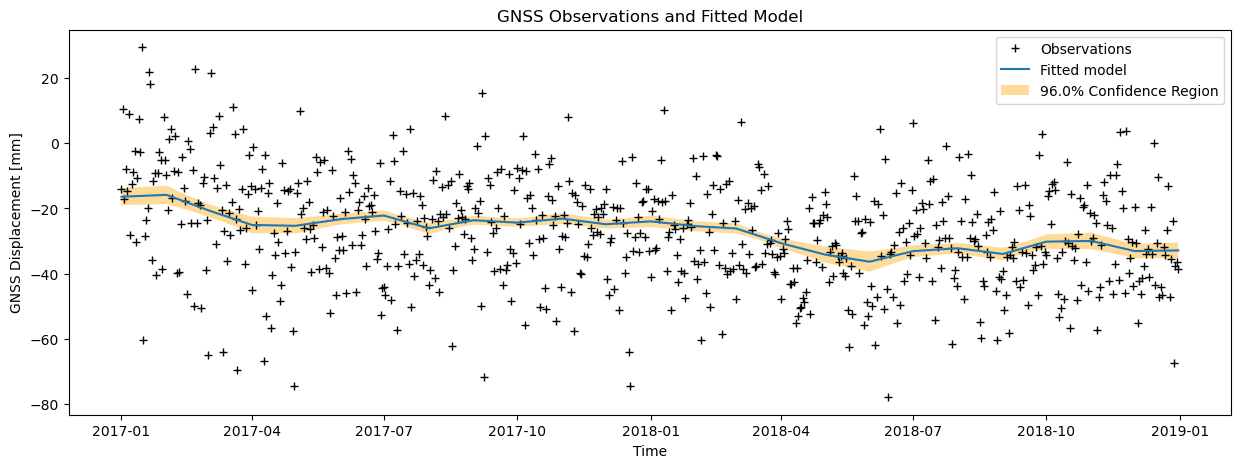

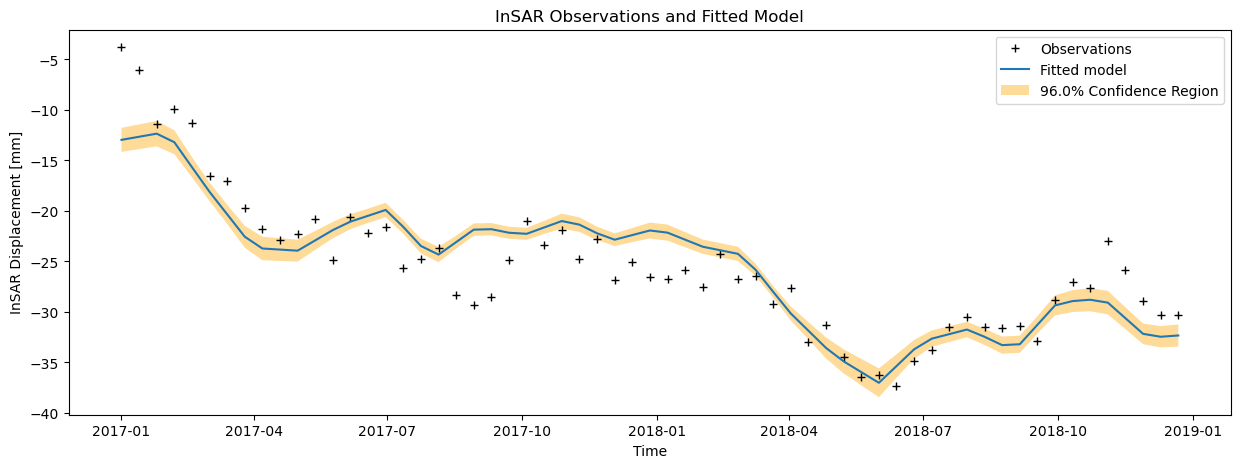

In [73]:
figure_GNSS, ax_GNSS = plot_model(model_gnss)
figure_insar, ax_insar = plot_model(model_insar)

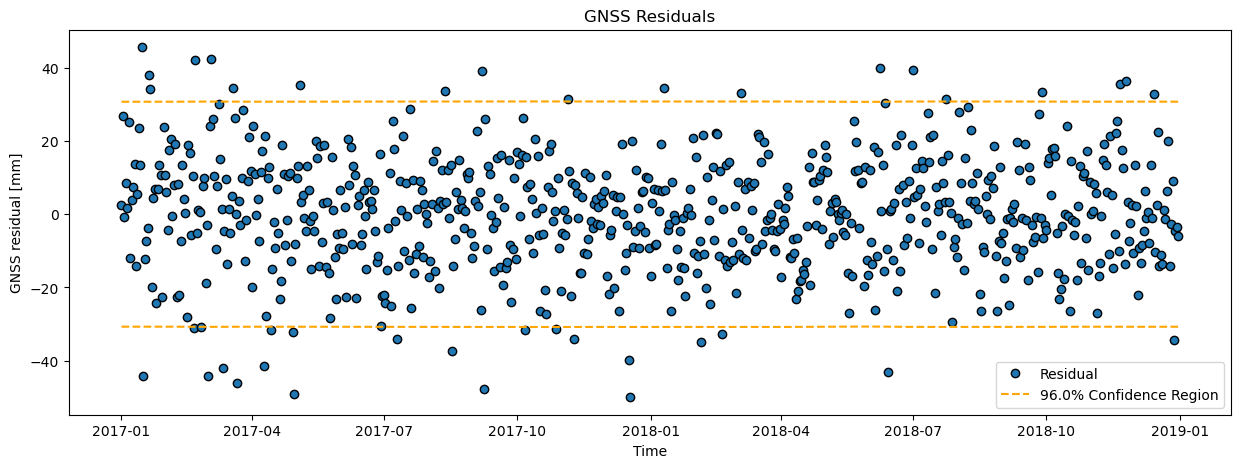

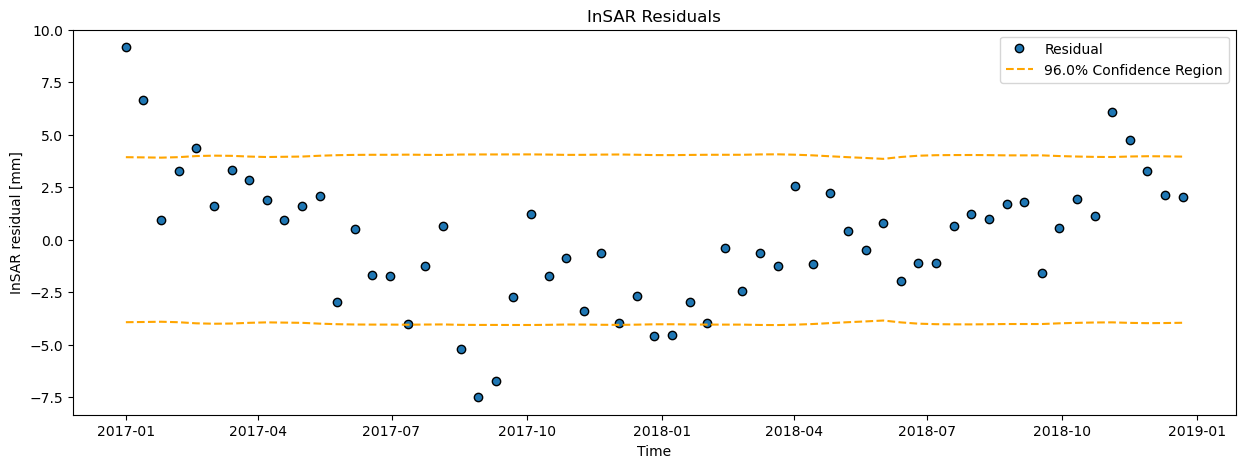

In [124]:
figure_GNSS_resi, ax_GNSS_resi = plot_residual(model_gnss)
figure_insar_resi, ax_insar_resi = plot_residual(model_insar)

The mean value of the GNSS residuals is 0.0 mm
The standard deviation of the GNSS residuals is 15.393 mm
The mean value of the InSAR residuals is 0.0 mm
The standard deviation of the InSAR residuals is 3.115 mm


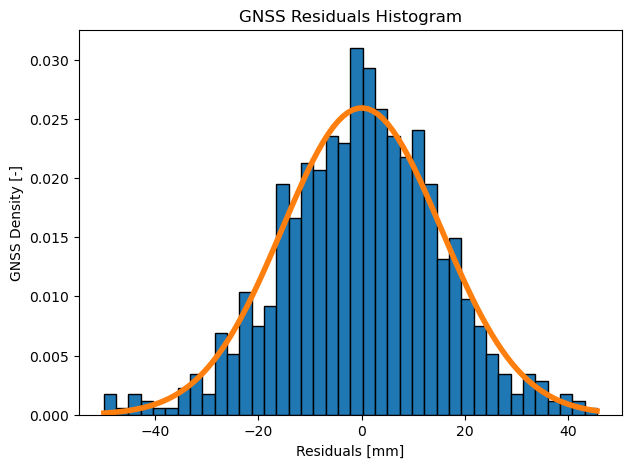

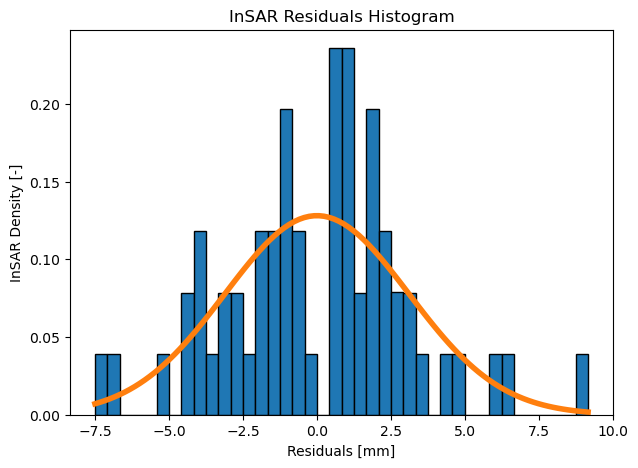

In [125]:
figure_GNSS_hist , ax_GNSS_hist = plot_residual_histogram(model_gnss)
figure_insar_hist , ax_insar_hist = plot_residual_histogram(model_insar)

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.